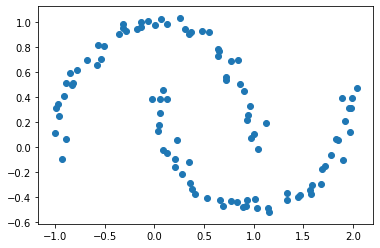

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
%matplotlib inline
moons = make_moons(n_samples=100, shuffle=True, noise=0.05)
plt.scatter(moons[0][:,0], moons[0][:,1])

In [17]:
type(moons)
print(len(moons))
print(len(moons[0]))
print(len(moons[0][0]))

2
100
2


In [20]:
moons[0][:,0]

array([ 0.69477533,  0.9654849 ,  1.6103107 ,  1.99971032,  1.22016315,
       -0.83141903,  0.14922428, -0.15165723,  0.4563176 , -0.95985497,
        0.73646963, -0.73686053,  1.11002265,  1.99663376, -0.34570636,
        0.35296865,  0.85518748,  0.05705662,  0.55820577, -0.92028246,
       -0.39872814,  0.28353086,  0.20313381,  1.33859192,  0.85155177,
        1.04981739,  0.38828946,  0.53000251, -0.47016717,  1.00549881,
        0.30144518,  0.93692582,  0.23992148,  1.05483675, -1.06116892,
       -0.75022476, -0.95561428, -0.75432351,  1.73903048, -0.08591871,
        0.31679532, -0.87609414, -0.04043641, -1.08457705,  0.35509984,
        2.07258721,  1.97056236, -0.02295052,  1.6674597 ,  0.80323078,
        0.1304772 ,  1.09679094,  1.96806998,  1.75937585, -0.97203244,
        0.64024915,  1.93327988, -0.02357614, -0.33905497,  0.7983381 ,
        1.12097973,  0.4977137 ,  1.83685025,  0.05178498,  0.26068858,
        1.53460795,  1.44510601, -0.44155811, -0.03925023,  1.56

In [5]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=10).fit(moons[0])
dbscan.labels_
## eps: specifies how close points should be to each other
## to be considered a part of a cluster. It means that 
## if the distance between two points is lower or equal to this value (eps), 
## these points are considered neighbors.


'''minSamples: the minimum number of points to form a dense region. 
For example, if we set the minPoints parameter as 5, 
then we need at least 5 points to form a dense region.'''

'minSamples: the minimum number of points to form a dense region. \nFor example, if we set the minPoints parameter as 5, \nthen we need at least 5 points to form a dense region.'

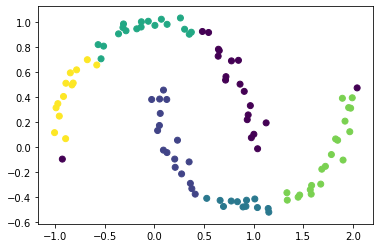

In [6]:
plt.scatter(moons[0][:,0], moons[0][:,1], c=dbscan.labels_)

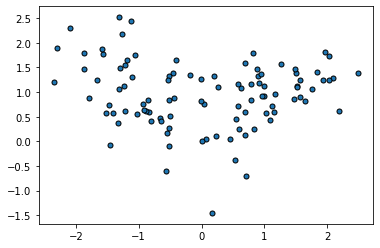

In [7]:
from sklearn.datasets import make_classification
from sklearn import mixture

X = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1)
plt.scatter(X[0][:, 0], X[0][:, 1], marker='o', s=25, edgecolor='k')

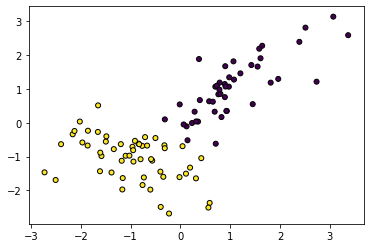

In [6]:
gmm = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(X[0])
plt.scatter(X[0][:, 0], X[0][:, 1], marker='o', c=gmm.predict(X[0]),
            s=25, edgecolor='k')


In [22]:
import pandas as pd
census = pd.read_csv('./acs2015_county_data.csv')
census = census.dropna()
census = census.drop(['CensusId','State', 'County'], axis=1)
census.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,20714,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,17495,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,0.0,42345,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [32]:
dbscan1 = DBSCAN(eps=0.3, min_samples=5).fit(np.array(census))
x = dbscan1.labels_
pd.Series(x).unique()

array([-1])